# Campaign Effectiveness Analysis

### Objective

The Michael J Fox Foundation continually seeks novel ways of engaging its constituents. Ever proactive, teams experiment with new marketing campaigns, content, and segmentation. For instance, in 2013, the donation threshold for assigning a donor to a relationship manager was lowered from $2500 to a $1000 in hopes of strengthening donor loyalty and increasing revenue. Once assigned, the donor receives personalized messaging and speaks with a relationship manager on the phone or in-person.
 
The attached data set contains anonymized donation records from 2010 - 2017. This notebook will walk through how I read, clean and finally analyze the data. And give the reader an insight of the effectiveness of the campaign.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Setup the view
%matplotlib inline
plt.style.use('seaborn-muted')
pd.options.display.float_format = '{:.2f}'.format

# Read the file and take a glimpse of what's inside 
donation_df = pd.read_csv('senior+analyst+assessment.csv')
donation_df.info()
display(donation_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753687 entries, 0 to 753686
Data columns (total 10 columns):
Account.Account_ID_18_Characters__c    753687 non-null object
2010 Sum                               204045 non-null float64
2011 Sum                               215504 non-null float64
2012 Sum                               232997 non-null float64
2013 Sum                               235016 non-null float64
2014 Sum                               262870 non-null float64
2015 Sum                               278062 non-null float64
2016 Sum                               274388 non-null float64
2017 Sum                               257432 non-null float64
Date_Assigned_to_Advancement__c        5920 non-null object
dtypes: float64(8), object(2)
memory usage: 57.5+ MB


,Account.Account_ID_18_Characters__c,2010 Sum,2011 Sum,2012 Sum,2013 Sum,2014 Sum,2015 Sum,2016 Sum,2017 Sum,Date_Assigned_to_Advancement__c
0,0013600000VCRPtAAP,nan,nan,nan,nan,25.00,25.00,25.00,nan,NaN
1,0013600000VDLBdAAP,nan,nan,nan,nan,nan,100.00,100.00,50.00,NaN
2,0013600000VAfvJAAT,nan,nan,nan,600.00,nan,250.00,250.00,100.00,NaN
3,0013600000VDKj4AAH,nan,nan,nan,nan,nan,1000.00,450.00,700.00,NaN
4,0013600000blHyqAAE,nan,nan,nan,nan,nan,nan,1000.00,5000.00,NaN


In [2]:
new_names = {'Account.Account_ID_18_Characters__c': 'Id', 
             '2010 Sum': '2010',
             '2011 Sum': '2011',
             '2012 Sum': '2012',
             '2013 Sum': '2013',
             '2014 Sum': '2014',
             '2015 Sum': '2015',
             '2016 Sum': '2016',
             '2017 Sum': '2017',
             'Date_Assigned_to_Advancement__c': 'Ad_Date'
            }
donation_df = donation_df.rename(columns= new_names )
donation_df['Ad_Date'] =  pd.to_datetime(donation_df['Ad_Date'])
donation_df.head()

,Id,2010,2011,2012,2013,2014,2015,2016,2017,Ad_Date
0,0013600000VCRPtAAP,nan,nan,nan,nan,25.00,25.00,25.00,nan,NaT
1,0013600000VDLBdAAP,nan,nan,nan,nan,nan,100.00,100.00,50.00,NaT
2,0013600000VAfvJAAT,nan,nan,nan,600.00,nan,250.00,250.00,100.00,NaT
3,0013600000VDKj4AAH,nan,nan,nan,nan,nan,1000.00,450.00,700.00,NaT
4,0013600000blHyqAAE,nan,nan,nan,nan,nan,nan,1000.00,5000.00,NaT


In [3]:
donation_df.describe()

,2010,2011,2012,2013,2014,2015,2016,2017
count,204045.00,215504.00,232997.00,235016.00,262870.00,278062.00,274388.00,257432.00
mean,10874.91,11893.47,15649.13,17783.95,14416.65,14370.98,15138.82,14193.21
std,393503.06,420508.40,698967.99,652535.98,557288.06,560500.59,550691.54,528648.78
min,1.00,0.78,0.01,0.44,0.00,0.00,0.00,0.76
25%,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00
50%,100.00,108.00,120.00,100.00,108.00,120.00,105.00,100.00
75%,409.11,486.79,475.00,486.79,448.28,440.00,400.00,400.00
max,25051399.58,27422137.51,47672033.23,43780150.49,40390543.85,41845430.56,39619130.57,37982104.69


In [4]:
# Found some duplicates IDs
display(pd.DataFrame(donation_df.Id.value_counts().head(5)))

,Id
0013600000V99Y9AAJ,1276
0013600000VBLUMAA5,1054
0013600000V9BtLAAV,1006
0013600000V98MSAAZ,462
0013600000V99R9AAJ,454


In [5]:
# Remove duplicates
donation_df = donation_df.drop_duplicates()
display(pd.DataFrame(donation_df.Id.value_counts().head(5)))

,Id
0013600001YMbPdAAL,1
0013600000VA1YEAA1,1
0013600000VCd6SAAT,1
0013600000V9EMCAA3,1
0013600000VCvWIAA1,1


In [6]:
# Total observation drop from 753,678 to 403,828
donation_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403828 entries, 0 to 728427
Data columns (total 10 columns):
Id         403828 non-null object
2010       48108 non-null float64
2011       51693 non-null float64
2012       57463 non-null float64
2013       56040 non-null float64
2014       66117 non-null float64
2015       78040 non-null float64
2016       84714 non-null float64
2017       92291 non-null float64
Ad_Date    824 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 33.9+ MB


In [7]:
# Check the Ad_date
Ad_date_test = donation_df.sort_values(['Ad_Date'], ascending=False)
Ad_date_test.loc[~Ad_date_test.Ad_Date.isnull()].head(10)

,Id,2010,2011,2012,2013,2014,2015,2016,2017,Ad_Date
58407,0013600000VDWzSAAX,nan,nan,nan,nan,nan,nan,50.00,1500.00,2018-01-02
106023,0013600001YNd0LAAT,nan,nan,nan,nan,nan,nan,nan,2000.00,2018-01-02
106021,0013600001YNcbAAAT,nan,nan,nan,nan,nan,nan,nan,5000.00,2018-01-02
109907,0013600000V9pahAAB,nan,nan,nan,nan,nan,nan,nan,10000.00,2018-01-02
10174,0013600000VCunwAAD,nan,nan,nan,nan,nan,500.00,nan,3500.00,2018-01-02
97234,0013600000VBOgMAAX,nan,150.00,nan,nan,83.00,3475.00,1299.53,1565.00,2017-12-29
97233,0013600001YMv6FAAT,nan,nan,nan,nan,nan,nan,nan,1000.00,2017-12-29
103750,0013600001YMvxWAAT,nan,nan,nan,nan,nan,nan,nan,4000.00,2017-12-29
95959,0013600000VDJv2AAH,nan,nan,nan,nan,nan,100.00,400.00,2500.00,2017-12-29
117186,0013600001YMQ3yAAH,nan,nan,nan,nan,nan,nan,nan,1000.00,2017-12-27


In [8]:
Ad_date_test.loc[~Ad_date_test.Ad_Date.isnull()].tail(10)

,Id,2010,2011,2012,2013,2014,2015,2016,2017,Ad_Date
49363,0013600000VDBJfAAP,nan,nan,nan,nan,nan,7000.00,5000.00,9130.00,2016-02-11
124516,0013600000VGDTbAAP,nan,nan,nan,nan,nan,10000.00,20000.00,10000.00,2016-02-05
278723,0013600000VDPuqAAH,nan,nan,nan,nan,nan,nan,1000.00,nan,2016-01-29
59389,0013600000V9bHbAAJ,500.00,250.00,500.00,500.00,500.00,500.00,nan,500.00,2016-01-26
196921,0013600000VChtLAAT,nan,nan,nan,nan,500.00,1000.00,1890.59,1000.00,2016-01-25
420198,0013600000VDO6JAAX,nan,nan,nan,nan,nan,nan,1500.00,nan,2016-01-25
323801,0013600000V9ebrAAB,400.00,nan,nan,nan,nan,nan,nan,nan,2016-01-22
103939,0013600000VACclAAH,nan,50.00,68.00,60.00,18.00,1018.00,600.00,1000.00,2016-01-22
67568,0013600000VACezAAH,nan,675.00,1725.00,1500.00,nan,80.00,1000.00,nan,2016-01-12
18751,0013600000VCB0YAAX,784.00,50.00,6500.00,100.00,350.00,125.00,366.10,5470.00,2011-08-29


In [9]:
# All the Ad_date is after 2016, except one case have '2011-08-29' as Ad_date
# No Data after 2018, remove Ad_date after 2017/12/31
# Assume the case with Ad_date at 2011 is bad data, remove these row for now.

# We also assume the effect of the campaign can be observe in the same year, for instance, with a campaign
# assigned by the end of 2017, we assume the effect will show in 2017_sum.

donation_df = donation_df[(donation_df.Ad_Date.dt.year <= 2017) | 
                          (donation_df.Ad_Date.dt.year >= 2016) |
                          (donation_df.Ad_Date.isnull())]
donation_df.shape

(403828, 10)

In [10]:
# total donation of each year
year_mask = ['2010', '2011','2012','2013','2014','2015','2016','2017']
donation_df[year_mask].sum()

2010    57558886.83
2011    66985383.14
2012    88814201.19
2013    93719187.09
2014    84833788.40
2015    98810293.24
2016   117039144.60
2017   105108542.60
dtype: float64

In [11]:
# check how many donor only donate once
NA_mask = donation_df.isnull()
NA_mask = NA_mask.drop(['Id','Ad_Date'], axis=1)
NA_mask['sum'] = NA_mask.sum(axis=1)
NA_mask.loc[(NA_mask['sum'] == 7)].shape

(339576, 9)

In [12]:
# check how many donor only donate once and was at 2017
NA_mask.loc[(NA_mask['sum'] == 7) & (NA_mask['2017'] == False)].shape

(66990, 9)

In [13]:
# check how many donor only donate once and was at 2010
NA_mask.loc[(NA_mask['sum'] == 7) & (NA_mask['2010'] == False)].shape

(32728, 9)

In [14]:
# As we are trying to understand the effectiveness of the campaign,
# donor with only one record can not tell us much about the difference 
# before and after assigned the campaign.
# Therefore, we only keep the "repeat donors" in our dataset

only_one_record = (NA_mask['sum'] == 7)
rep_donation_df = donation_df.loc[~only_one_record]
rep_donation_df.info()
display(rep_donation_df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64252 entries, 0 to 712782
Data columns (total 10 columns):
Id         64252 non-null object
2010       15380 non-null float64
2011       19048 non-null float64
2012       22061 non-null float64
2013       23627 non-null float64
2014       27463 non-null float64
2015       30920 non-null float64
2016       31090 non-null float64
2017       25301 non-null float64
Ad_Date    530 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 5.4+ MB


,2010,2011,2012,2013,2014,2015,2016,2017
count,15380.00,19048.00,22061.00,23627.00,27463.00,30920.00,31090.00,25301.00
mean,3192.28,3124.72,3723.37,3696.71,2854.71,2883.94,3452.60,3407.94
std,204888.16,203279.59,325356.98,294692.83,245842.47,240090.83,237357.95,243663.12
min,1.00,0.78,0.01,0.44,0.00,0.00,0.00,1.00
25%,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00
50%,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
75%,250.00,225.00,200.00,200.00,200.00,240.00,250.00,250.00
max,25051399.58,27422137.51,47672033.23,43780150.49,40390543.85,41845430.56,39619130.57,37982104.69


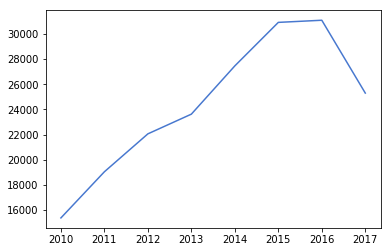

In [15]:
# Repeat donors trend
plt.plot(rep_donation_df.describe().loc['count']);

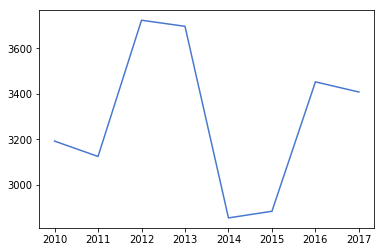

In [16]:
# Average donation of Repeat donors
plt.plot(rep_donation_df.describe().loc['mean']);

In [17]:
# Means are easily affected by extreme values
# To better understand the donation trend, I divided donors into two groups:
# 1. regular donor: Average donation under $ 100,000
# 2. vip donor: Average donation over or equals to $ 100,000

regular_donor = rep_donation_df.loc[rep_donation_df[year_mask].mean(axis=1) < 100000].copy()
vip_donor = rep_donation_df.loc[rep_donation_df[year_mask].mean(axis=1) >= 100000 ].copy()
print('regular donor: ' + str(regular_donor.shape[0]))
print('vip donor: ' + str(vip_donor.shape[0]))

regular donor: 64154
vip donor: 98


,2010,2011,2012,2013,2014,2015,2016,2017
count,15335.00,18999.00,22003.00,23574.00,27407.00,30854.00,31014.00,25231.00
mean,671.36,633.09,662.46,640.37,637.97,643.01,652.48,719.52
std,4827.90,4507.04,4531.18,4315.00,4825.69,4389.45,4475.09,4918.84
min,1.00,0.78,0.01,0.44,0.00,0.00,0.00,1.00
25%,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00
50%,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
75%,246.50,216.00,200.00,200.00,200.00,225.00,250.00,250.00
max,349297.54,277975.70,250000.00,202500.00,390000.00,192525.00,285500.00,269278.00


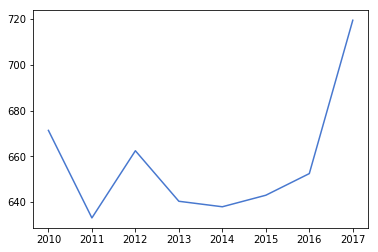

In [18]:
# The average donation of regular donors went up, although the donor count went down at 2107(lower than 2014)
display(regular_donor[year_mask].describe())
plt.plot(regular_donor[year_mask].describe().loc['mean']);

,2010,2011,2012,2013,2014,2015,2016,2017
count,45.00,49.00,58.00,53.00,56.00,66.00,76.00,70.00
mean,862266.11,969216.60,1164914.70,1363135.41,1087749.33,1050484.58,1146124.43,972430.23
std,3729282.86,3928618.90,6291662.45,6128693.64,5381919.12,5127753.25,4692432.88,4561307.52
min,1000.00,1500.00,150.00,0.54,253.00,2314.42,100.00,33.00
25%,70482.67,100000.00,66820.50,100000.00,100000.00,100000.00,98170.95,100000.00
50%,122100.00,150000.00,132190.50,152000.00,144907.50,207500.00,200000.00,200000.00
75%,378000.00,500000.00,317431.25,486000.00,423322.37,525403.40,573428.28,474537.50
max,25051399.58,27422137.51,47672033.23,43780150.49,40390543.85,41845430.56,39619130.57,37982104.69


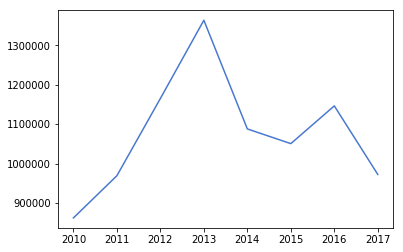

In [19]:
# Opposed to regular donors, The average donation of vip donors went down, 
# the donor count is high at 2107 a little (still better than 2015)
display(vip_donor[year_mask].describe())
plt.plot(vip_donor[year_mask].describe().loc['mean']);

In [20]:
# Take a closer look of the donor distribution
# I grouped donors into the following five group:
# 1. Donate less than $500
# 2. $500 to $1,500
# 3. $1,500 to $10,000
# 4. $10,000 to 100,000
# 5. Over 100,000

group_rep_donation_df = rep_donation_df[['Id','Ad_Date']].copy()


for year in range(2010,2018):
    year = str(year)
    var = year + '_group'
    group_rep_donation_df[var] = np.where(rep_donation_df[year].isnull(),
                                 np.nan,
                                 np.where(rep_donation_df[year] < 500, 
                                          '<500',
                                          np.where((rep_donation_df[year] >= 500) & (rep_donation_df[year] < 1500) , 
                                                   '500 - 1500',
                                                    np.where((rep_donation_df[year] >= 1500) & (rep_donation_df[year] < 10000) , 
                                                             '1500 - 10000',
                                                             np.where((rep_donation_df[year] >= 10000) & (rep_donation_df[year] < 100000) , 
                                                                      '10000 - 100000',
                                                                      'over 100000')))))
group_rep_donation_df.head(3)

,Id,Ad_Date,2010_group,2011_group,2012_group,2013_group,2014_group,2015_group,2016_group,2017_group
0,0013600000VCRPtAAP,NaT,nan,nan,nan,nan,<500,<500,<500,nan
1,0013600000VDLBdAAP,NaT,nan,nan,nan,nan,nan,<500,<500,<500
2,0013600000VAfvJAAT,NaT,nan,nan,nan,500 - 1500,nan,<500,<500,<500


In [21]:
# Then separate those without campaign, with campaign, those assigned at 2016 and assigned at 2017
# to see how the donation change after assigning campaign.
non_rep_donation_df   = group_rep_donation_df.loc[group_rep_donation_df.Ad_Date.isnull()].copy()
ad_rep_donation_df   = group_rep_donation_df.loc[~(group_rep_donation_df.Ad_Date.isnull())].copy()
ad16_rep_donation_df = group_rep_donation_df.loc[group_rep_donation_df.Ad_Date.dt.year == 2016].copy()
ad17_rep_donation_df = group_rep_donation_df.loc[group_rep_donation_df.Ad_Date.dt.year == 2017].copy()
display(non_rep_donation_df.head(3))
display(ad_rep_donation_df.head(3))
display(ad16_rep_donation_df.head(3))
display(ad17_rep_donation_df.head(3))

,Id,Ad_Date,2010_group,2011_group,2012_group,2013_group,2014_group,2015_group,2016_group,2017_group
0,0013600000VCRPtAAP,NaT,nan,nan,nan,nan,<500,<500,<500,nan
1,0013600000VDLBdAAP,NaT,nan,nan,nan,nan,nan,<500,<500,<500
2,0013600000VAfvJAAT,NaT,nan,nan,nan,500 - 1500,nan,<500,<500,<500


,Id,Ad_Date,2010_group,2011_group,2012_group,2013_group,2014_group,2015_group,2016_group,2017_group
5,0013600000VC4yPAAT,2017-05-22,nan,nan,1500 - 10000,500 - 1500,1500 - 10000,10000 - 100000,10000 - 100000,10000 - 100000
6,0013600000VD0GFAA1,2016-05-06,nan,nan,nan,nan,nan,500 - 1500,1500 - 10000,1500 - 10000
469,0013600000VA5rXAAT,2017-03-16,500 - 1500,nan,1500 - 10000,nan,500 - 1500,1500 - 10000,500 - 1500,500 - 1500


,Id,Ad_Date,2010_group,2011_group,2012_group,2013_group,2014_group,2015_group,2016_group,2017_group
6,0013600000VD0GFAA1,2016-05-06,nan,nan,nan,nan,nan,500 - 1500,1500 - 10000,1500 - 10000
566,0013600000VAW9SAAX,2016-03-03,1500 - 10000,nan,1500 - 10000,nan,500 - 1500,nan,nan,nan
8790,0013600000VBaJOAA1,2016-03-29,<500,<500,nan,nan,nan,nan,nan,nan


,Id,Ad_Date,2010_group,2011_group,2012_group,2013_group,2014_group,2015_group,2016_group,2017_group
5,0013600000VC4yPAAT,2017-05-22,nan,nan,1500 - 10000,500 - 1500,1500 - 10000,10000 - 100000,10000 - 100000,10000 - 100000
469,0013600000VA5rXAAT,2017-03-16,500 - 1500,nan,1500 - 10000,nan,500 - 1500,1500 - 10000,500 - 1500,500 - 1500
528,0013600001HIwmiAAD,2017-08-23,nan,nan,nan,nan,500 - 1500,1500 - 10000,nan,<500


In [22]:
# calculate the donor counts differences between years,
# to see how donors in each group increase or decrease

ad_df_dict={}
non_df_dict={}
for year in range(2010,2018):
    var = str(year) + '_group'
    var_count = '_' + str(year) + '_group'
    ad_df_dict[var_count] = pd.DataFrame(ad_rep_donation_df[var].value_counts())
    non_df_dict[var_count] = pd.DataFrame(non_rep_donation_df[var].value_counts())

ad_all_counts = pd.concat([ad_df_dict['_2010_group'], ad_df_dict['_2011_group'], ad_df_dict['_2012_group'],
                           ad_df_dict['_2013_group'], ad_df_dict['_2014_group'], ad_df_dict['_2015_group'],
                           ad_df_dict['_2016_group'], ad_df_dict['_2017_group']],axis=1)

non_all_counts = pd.concat([non_df_dict['_2010_group'], non_df_dict['_2011_group'], non_df_dict['_2012_group'],
                            non_df_dict['_2013_group'], non_df_dict['_2014_group'], non_df_dict['_2015_group'],
                            non_df_dict['_2016_group'], non_df_dict['_2017_group']],axis=1)

for year in range(2011,2018):
    diff = str(year) + '_diff'
    group = str(year) + '_group'
    pre_grp = str(year-1) + '_group'
    ad_all_counts[diff] = ((ad_all_counts[group] - ad_all_counts[pre_grp])/ad_all_counts[pre_grp])*100
    non_all_counts[diff] = ((non_all_counts[group] - non_all_counts[pre_grp])/non_all_counts[pre_grp])*100

ad_count_trend = ad_all_counts[['2011_group','2012_group','2013_group','2014_group','2015_group','2016_group','2017_group']]
ad_count_trend = ad_count_trend.drop(['nan'])
non_count_trend = non_all_counts[['2011_group','2012_group','2013_group','2014_group','2015_group','2016_group','2017_group']]
non_count_trend = non_count_trend.drop(['nan'])



ad_diff_trend = ad_all_counts[['2011_diff','2012_diff','2013_diff','2014_diff','2015_diff','2016_diff','2017_diff']]
ad_diff_trend = ad_diff_trend.drop(['nan'])
non_diff_trend = non_all_counts[['2011_diff','2012_diff','2013_diff','2014_diff','2015_diff','2016_diff','2017_diff']]
non_diff_trend = non_diff_trend.drop(['nan'])
ad_diff_trend = ad_diff_trend.rename(columns= {'2011_diff':'2011', '2012_diff':'2012', '2013_diff':'2013', 
                                         '2014_diff':'2014', '2015_diff':'2015', '2016_diff':'2016', 
                                         '2017_diff':'2017'})
non_diff_trend = non_diff_trend.rename(columns= {'2011_diff':'2011', '2012_diff':'2012', '2013_diff':'2013', 
                                         '2014_diff':'2014', '2015_diff':'2015', '2016_diff':'2016', 
                                         '2017_diff':'2017'})

In [23]:
display(ad_count_trend)
display(non_count_trend)

,2011_group,2012_group,2013_group,2014_group,2015_group,2016_group,2017_group
10000 - 100000,32,32,19,33,26,35,31
1500 - 10000,64,72,77,82,107,121,118
500 - 1500,48,52,59,69,93,111,81
<500,48,66,63,81,100,74,65
over 100000,3,3,5,4,4,4,6


,2011_group,2012_group,2013_group,2014_group,2015_group,2016_group,2017_group
<500,16026,18607,20027,23299,26087,26060,20893
500 - 1500,1836,2069,2157,2519,2941,3023,2673
1500 - 10000,740,850,882,1015,1149,1233,1029
10000 - 100000,204,261,290,302,349,359,336
over 100000,47,49,48,59,64,70,69


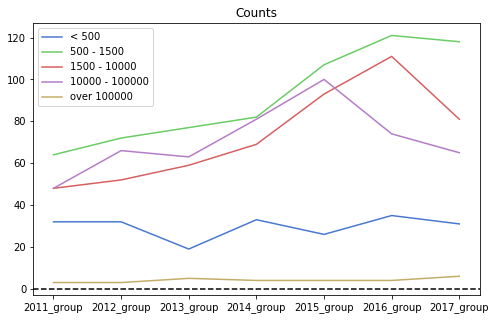

In [24]:
plt.figure(figsize=(8, 5))
plt.plot(ad_count_trend.transpose())
plt.axhline(0, color='black', ls='--')
plt.title('Counts')
plt.legend(('< 500', '500 - 1500','1500 - 10000', '10000 - 100000', 'over 100000'));

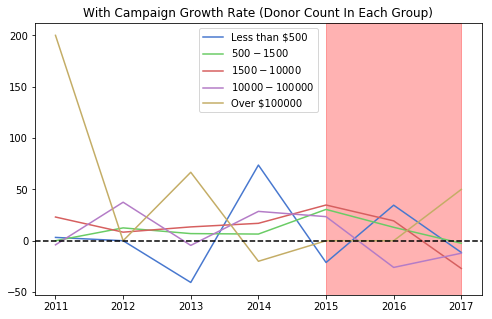

In [25]:
plt.figure(figsize=(8, 5))
plt.plot(ad_diff_trend.transpose())
plt.axhline(0, color='black', ls='--')
plt.title('With Campaign Growth Rate (Donor Count In Each Group)')
plt.axvspan(2015, 2017, color='red', alpha=0.3)
plt.legend(('Less than $500', '$500 - $1500','$1500 - $10000', '$10000 - $100000', 'Over $100000'));

In [26]:
# The campaign started at 2016
# we want to see if the donation increase after the campaign
# and if the donor with campaign outperformance those without 

before_mask = ['2010', '2011','2012','2013','2014','2015']
after_mask  = ['2016','2017']
no_rep_donation_df = rep_donation_df.loc[rep_donation_df.Ad_Date.isnull()].copy()

no_rep_donation_df['b_ave'] = no_rep_donation_df[before_mask].mean(axis=1)
no_rep_donation_df['a_ave'] = no_rep_donation_df[after_mask].mean(axis=1)
no_rep_donation_df['b_ave'] = no_rep_donation_df['b_ave'].replace({np.nan:0})
no_rep_donation_df['a_ave'] = no_rep_donation_df['a_ave'].replace({np.nan:0})
no_rep_donation_df['diff'] = np.where(no_rep_donation_df['a_ave'] > no_rep_donation_df['b_ave'],
                                       'Increase',
                                        np.where(no_rep_donation_df['a_ave'] < no_rep_donation_df['b_ave'],
                                                 'Decrease',
                                                 'No Change'
                                                )
                                       )

_no_effect = pd.DataFrame(no_rep_donation_df['diff'].value_counts())
_no_effect['Perc'] = _no_effect['diff']/64249
_no_effect

,diff,Perc
Decrease,37594,0.59
Increase,19502,0.30
No Change,6626,0.10


In [27]:
before_mask = ['2010', '2011','2012','2013','2014','2015']
after_mask  = ['2016','2017']

ad16_rep_donation_df = rep_donation_df.loc[rep_donation_df.Ad_Date.dt.year == 2016].copy()
ad16_rep_donation_df['b_ave'] = ad16_rep_donation_df[before_mask].mean(axis=1)
ad16_rep_donation_df['a_ave'] = ad16_rep_donation_df[after_mask].mean(axis=1)
ad16_rep_donation_df['b_ave'] = ad16_rep_donation_df['b_ave'].replace({np.nan:0})
ad16_rep_donation_df['a_ave'] = ad16_rep_donation_df['a_ave'].replace({np.nan:0})
ad16_rep_donation_df['diff'] = np.where(ad16_rep_donation_df['a_ave'] > ad16_rep_donation_df['b_ave'],
                                       'Increase',
                                        np.where(ad16_rep_donation_df['a_ave'] < ad16_rep_donation_df['b_ave'],
                                                 'Decrease',
                                                 'No Change'
                                                )
                                       )

_16_effect = pd.DataFrame(ad16_rep_donation_df['diff'].value_counts())
_16_effect['Perc'] = _16_effect['diff']/118
_16_effect

,diff,Perc
Increase,56,0.47
Decrease,51,0.43
No Change,11,0.09


In [28]:
before_mask = ['2010', '2011','2012','2013','2014','2015', '2016']
after_mask  = ['2017']

ad17_rep_donation_df = rep_donation_df.loc[rep_donation_df.Ad_Date.dt.year == 2017].copy()
ad17_rep_donation_df['b_ave'] = ad17_rep_donation_df[before_mask].mean(axis=1)
ad17_rep_donation_df['a_ave'] = ad17_rep_donation_df[after_mask].mean(axis=1)
ad17_rep_donation_df['b_ave'] = ad17_rep_donation_df['b_ave'].replace({np.nan:0})
ad17_rep_donation_df['a_ave'] = ad17_rep_donation_df['a_ave'].replace({np.nan:0})
ad17_rep_donation_df['diff'] = np.where(ad17_rep_donation_df['a_ave'] > ad17_rep_donation_df['b_ave'],
                                       'Increase',
                                        np.where(ad17_rep_donation_df['a_ave'] < ad17_rep_donation_df['b_ave'],
                                                 'Decrease',
                                                 'No Change'
                                                )
                                       )

_17_effect = pd.DataFrame(ad17_rep_donation_df['diff'].value_counts())
_17_effect['Perc'] = _17_effect['diff']/409*100
_17_effect

,diff,Perc
Decrease,272,66.50
Increase,125,30.56
No Change,12,2.93


In [29]:
# The campaign seems to be effective. However, those who been selected to be assigned a campaign, 
# always have higher average donation.
all_means = pd.DataFrame(rep_donation_df[year_mask].describe().loc['mean']).rename(columns= {'mean': 'all_mean'})
ad_means = pd.DataFrame(rep_donation_df[year_mask].loc[~(rep_donation_df.Ad_Date.isnull())].describe().loc['mean']).rename(columns= {'mean': 'ad_mean'})
n_ad_means = pd.DataFrame(rep_donation_df[year_mask].loc[(rep_donation_df.Ad_Date.isnull())].describe().loc['mean']).rename(columns= {'mean': 'non_ad_mean'})
means = pd.concat([all_means, ad_means, n_ad_means],axis=1)
means

,all_mean,ad_mean,non_ad_mean
2010,3192.28,6179.72,3155.90
2011,3124.72,22000.62,2929.49
2012,3723.37,6948.22,3690.14
2013,3696.71,54261.32,3214.92
2014,2854.71,14513.39,2739.38
2015,2883.94,11220.30,2794.01
2016,3452.60,37091.54,3075.13
2017,3407.94,10682.60,3320.36


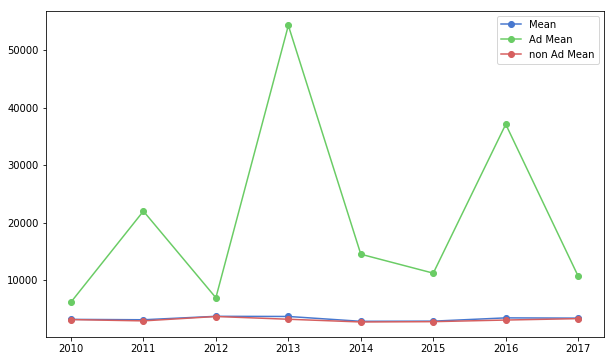

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(means['all_mean'], marker='o', label='Mean')
plt.plot(means['ad_mean'], marker='o', label='Ad Mean')
plt.plot(means['non_ad_mean'], marker='o', label='non Ad Mean')
plt.legend();